In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Load the dataset and split into features and target
data = pd.read_excel("data/MAINDATASET-1.xlsx")

---
**EDA**
---

In [ ]:
data.head()

desc_stats = data.describe()
desc_stats

,Verbal SAS,Quantitative SAS,Non-verbal SAS,Spatial SAS
count,330.000000,330.000000,330.000000,330.000000
mean,100.063636,94.709091,100.075758,95.727273
std,13.029271,17.803220,14.244191,18.485635
min,65.000000,0.000000,61.000000,0.000000
25%,91.250000,87.250000,90.000000,86.250000
50%,100.000000,96.000000,99.000000,97.000000
75%,109.000000,105.000000,109.750000,105.000000
max,141.000000,134.000000,141.000000,141.000000


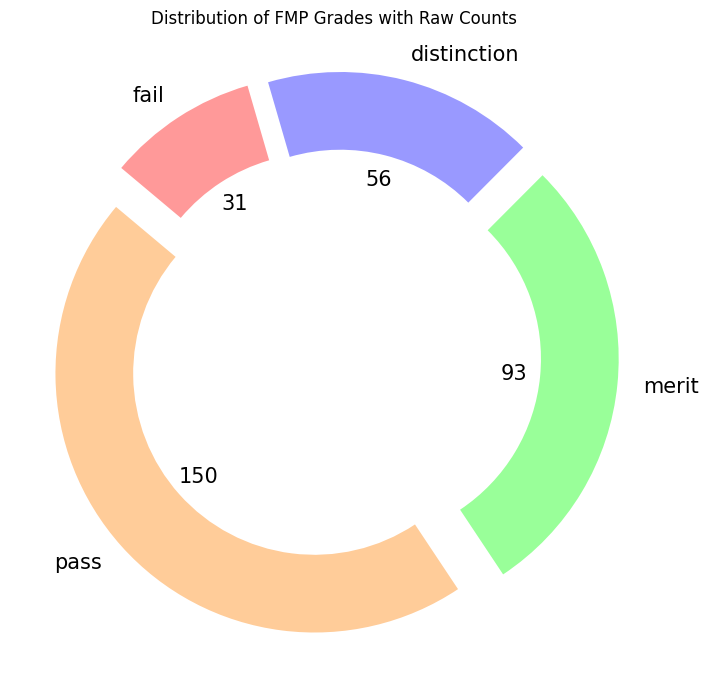

In [ ]:
# Count the occurrences of each unique value in the "FMP Grades" column
df = pd.read_excel("data/MAINDATASET-1.xlsx")
fmp_grades_counts = df["FMP Grades"].value_counts()

fmp_grades_counts

# Define pastel colors for the grades
colors_pastel = {
    'pass': '#FFCC99',       # Pastel yellow
    'fail': '#FF9999',       # Pastel red
    'distinction': '#9999FF', # Pastel blue
    'merit': '#99FF99'       # Pastel green
}

# Plot the counts for each FMP Grade in a pie chart with raw counts as labels using the updated pastel colors
plt.figure(figsize=(10, 7))
explode = (0.1, 0.1, 0.1, 0.1)  # explode all slices for better visibility

patches, texts, autotexts = plt.pie(fmp_grades_counts, labels=fmp_grades_counts.index,
                                    colors=[colors_pastel[grade] for grade in fmp_grades_counts.index],
                                    explode=explode,
                                    startangle=140, wedgeprops=dict(width=0.3),
                                    autopct=lambda p: '{:.0f}'.format(p * sum(fmp_grades_counts) / 100))

# Make the labels (counts) more visible
for t in texts:
    t.set(size=15)

for at in autotexts:
    at.set(size=15)

plt.title('Distribution of FMP Grades with Raw Counts')
plt.tight_layout()
plt.show()

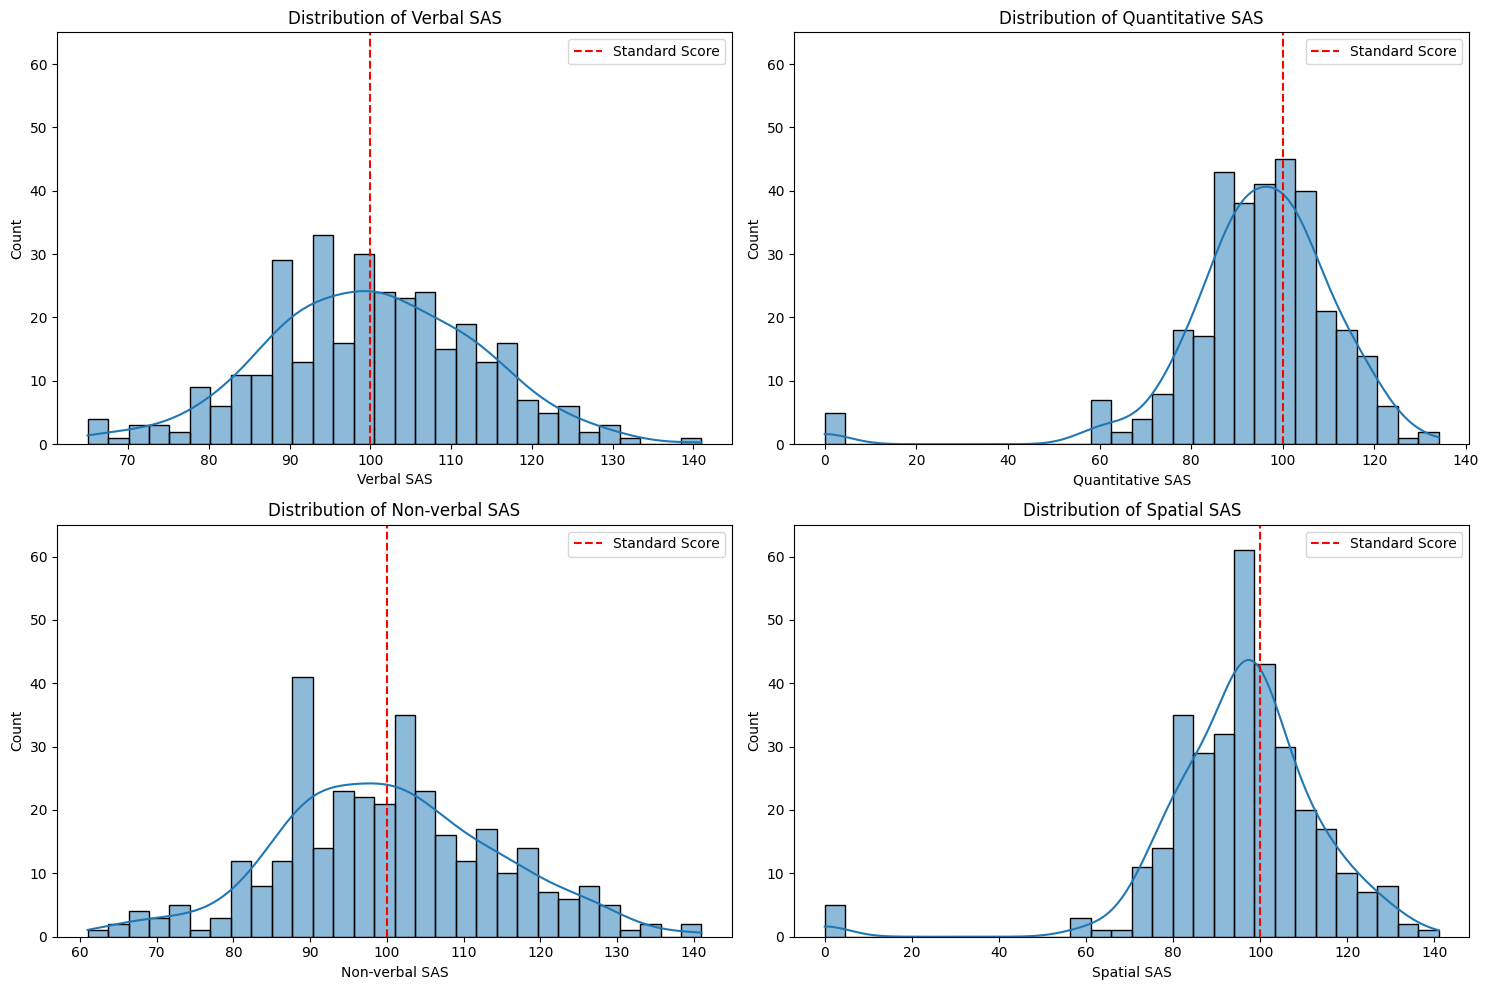

In [ ]:
# Determine the maximum y-axis value for all plots to have the same scale
dataset = data
max_count = 65
'''max_count = max(
    dataset['Verbal SAS'].value_counts().max(),
    dataset['Quantitative SAS'].value_counts().max(),
    dataset['Non-verbal SAS'].value_counts().max(),
    dataset['Spatial SAS'].value_counts().max()
)
'''

# Plot the distribution of numeric columns with a line at 100 and the same y-axis scale
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(dataset['Verbal SAS'], ax=ax[0, 0], kde=True, bins=30)
ax[0, 0].axvline(100, color='red', linestyle='--', label='Standard Score')
ax[0, 0].set_title('Distribution of Verbal SAS')
ax[0, 0].legend()
ax[0, 0].set_ylim(0, max_count)

sns.histplot(dataset['Quantitative SAS'], ax=ax[0, 1], kde=True, bins=30)
ax[0, 1].axvline(100, color='red', linestyle='--', label='Standard Score')
ax[0, 1].set_title('Distribution of Quantitative SAS')
ax[0, 1].legend()
ax[0, 1].set_ylim(0, max_count)

sns.histplot(dataset['Non-verbal SAS'], ax=ax[1, 0], kde=True, bins=30)
ax[1, 0].axvline(100, color='red', linestyle='--', label='Standard Score')
ax[1, 0].set_title('Distribution of Non-verbal SAS')
ax[1, 0].legend()
ax[1, 0].set_ylim(0, max_count)

sns.histplot(dataset['Spatial SAS'], ax=ax[1, 1], kde=True, bins=30)
ax[1, 1].axvline(100, color='red', linestyle='--', label='Standard Score')
ax[1, 1].set_title('Distribution of Spatial SAS')
ax[1, 1].legend()
ax[1, 1].set_ylim(0, max_count)

plt.tight_layout()
plt.show()

In [ ]:
# Create a new feature "mean SAS" which is the mean of the four SAS scores for each row
dataset['mean SAS'] = dataset[['Verbal SAS', 'Quantitative SAS', 'Non-verbal SAS', 'Spatial SAS']].mean(axis=1)
dataset.head()

,Verbal SAS,Quantitative SAS,Non-verbal SAS,Spatial SAS,FMP Grades,mean SAS
0,90,103,109,95,distinction,99.25
1,122,122,124,123,distinction,122.75
2,86,100,113,100,merit,99.75
3,82,82,95,98,pass,89.25
4,89,89,121,98,distinction,99.25


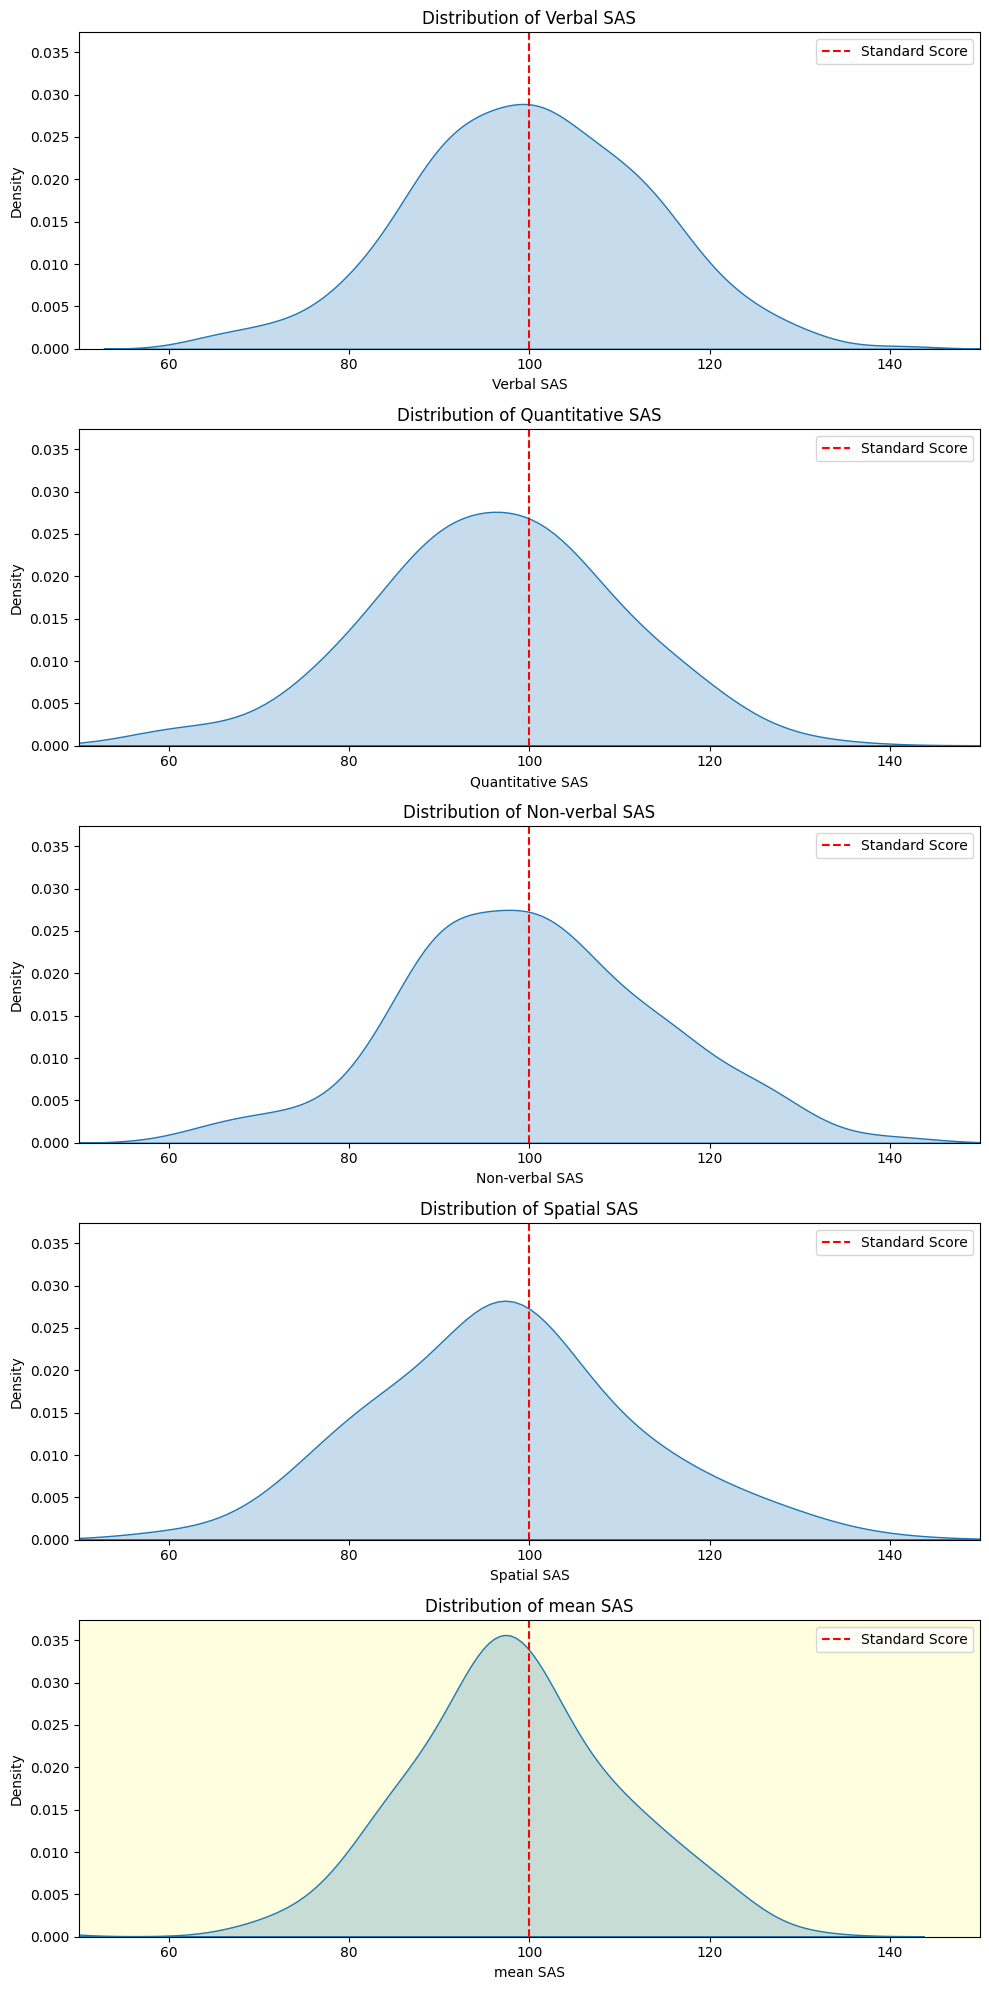

In [ ]:
# Plot the KDE distributions with an even lighter yellow background for "mean SAS"
fig, ax = plt.subplots(5, 1, figsize=(10, 20))
features = ['Verbal SAS', 'Quantitative SAS', 'Non-verbal SAS', 'Spatial SAS', 'mean SAS']

# Determine the maximum y-axis value for all plots to have the same scale
max_density = max(
    dataset['Verbal SAS'].plot(kind='kde').get_ylim()[1],
    dataset['Quantitative SAS'].plot(kind='kde').get_ylim()[1],
    dataset['Non-verbal SAS'].plot(kind='kde').get_ylim()[1],
    dataset['Spatial SAS'].plot(kind='kde').get_ylim()[1],
    dataset['mean SAS'].plot(kind='kde').get_ylim()[1]
)
plt.close()


# Plot the KDE distributions with the same y-axis scale and with a pastel yellow background for "mean SAS"
fig, ax = plt.subplots(5, 1, figsize=(10, 20))

for i, feature in enumerate(features):
    sns.kdeplot(dataset[feature], ax=ax[i], fill=True)
    ax[i].axvline(100, color='red', linestyle='--', label='Standard Score')
    ax[i].set_title(f'Distribution of {feature}')
    ax[i].legend()
    ax[i].set_xlim(50, 150)  # Setting the same x-axis limit for clear comparison
    ax[i].set_ylim(0, max_density)  # Setting the same y-axis limit

    # Change the background color for "mean SAS" plot
    if feature == "mean SAS":
        ax[i].set_facecolor('lightyellow')

plt.tight_layout()
plt.show()

c:\Users\rikkv\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


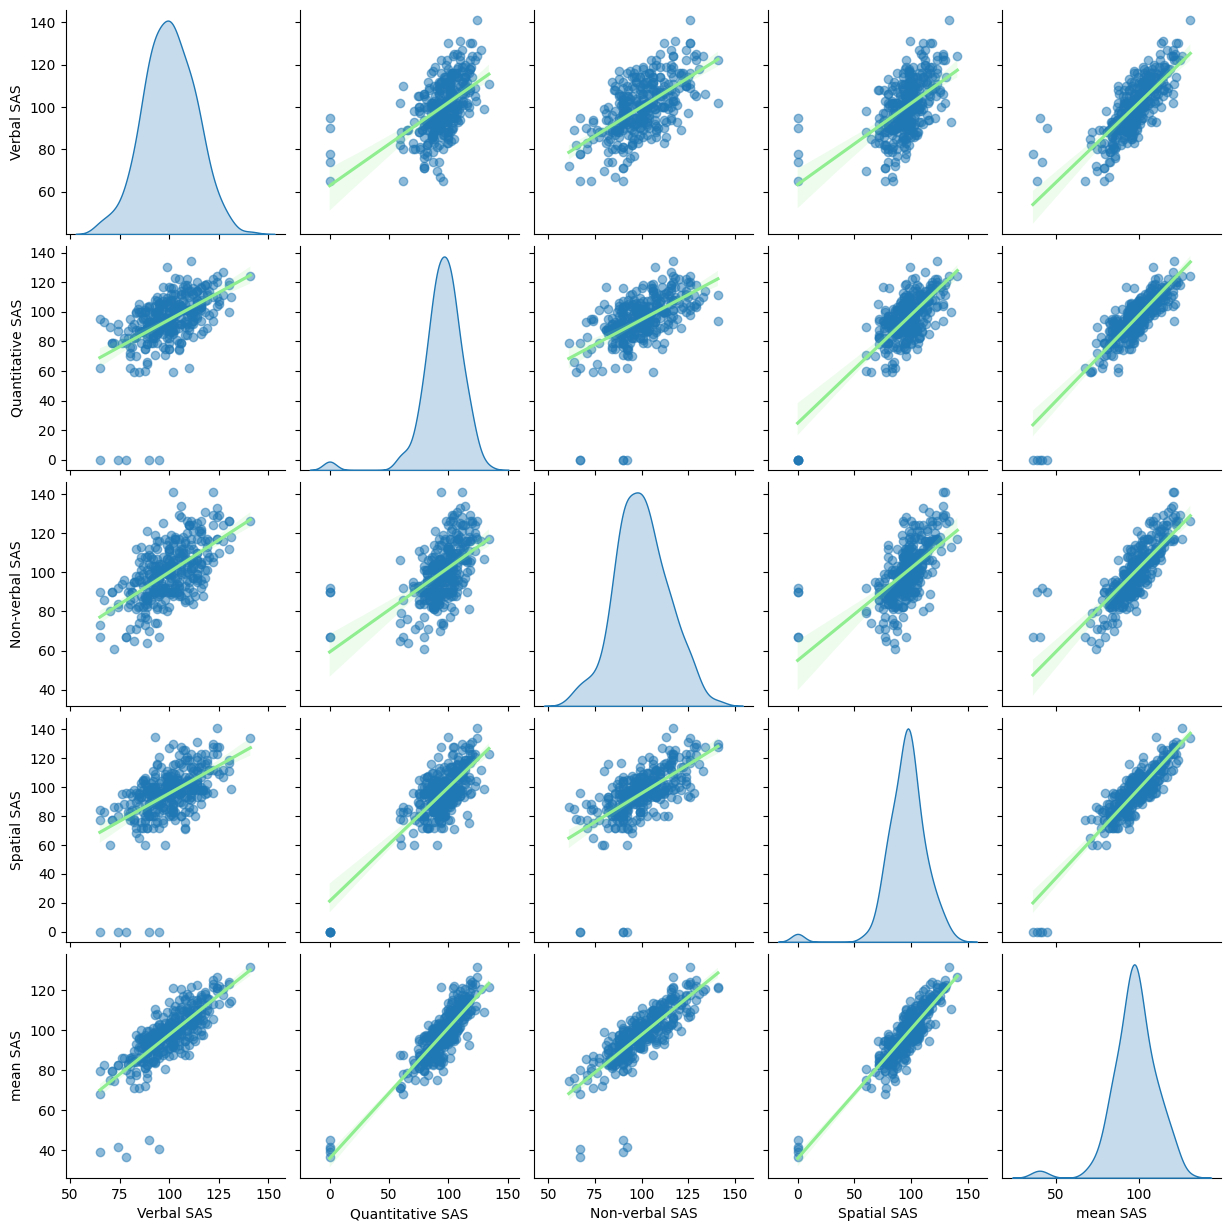

In [ ]:
# Select only the numerical columns for the pair plot
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Create the pair plot
sns.pairplot(data, vars=numerical_cols, kind="reg", diag_kind="kde", plot_kws={'line_kws':{'color':'lightgreen'}, 'scatter_kws': {'alpha': 0.5}})

# Display the plot
plt.show()

---
Correlation Matrix
---

In [ ]:
# Calculate the correlation matrix for the numerical columns
correlation_matrix = data.drop(columns=["FMP Grades"]).corr()

correlation_matrix

,Verbal SAS,Quantitative SAS,Non-verbal SAS,Spatial SAS,mean SAS
Verbal SAS,1.000000,0.536234,0.599438,0.542543,0.769577
Quantitative SAS,0.536234,1.000000,0.538574,0.758667,0.869501
Non-verbal SAS,0.599438,0.538574,1.000000,0.611057,0.803148
Spatial SAS,0.542543,0.758667,0.611057,1.000000,0.893431
mean SAS,0.769577,0.869501,0.803148,0.893431,1.000000


---
**MACHINE LEARNING MODELS**
---

In [ ]:

X = data.drop('FMP Grades', axis=1)
y = data['FMP Grades']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Linear SVM": SVC(kernel="linear", C=10),
    "Kernel SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(max_iter=10000)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    results[name] = accuracy

results

{'Logistic Regression': 0.48484848484848486,
 'Linear SVM': 0.4393939393939394,
 'Kernel SVM': 0.42424242424242425,
 'Decision Tree': 0.2878787878787879,
 'Random Forest': 0.4696969696969697,
 'Gradient Boosting': 0.42424242424242425,
 'Neural Network': 0.4696969696969697}

In [ ]:
# Convert the dictionary into a DataFrame and round the values to 2 decimal points
given_results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy']).round(2)

# Display the table
given_results_df.sort_values(by="Accuracy", ascending=False)

,Accuracy
Logistic Regression,0.48
Random Forest,0.47
Neural Network,0.47
Linear SVM,0.44
Kernel SVM,0.42
Gradient Boosting,0.42
Decision Tree,0.29


In [ ]:
# Generating classification reports for each model
classification_reports = {}

for model_name, model in models.items():
    predictions = model.predict(X_test)
    classification_reports[model_name] = classification_report(y_test, predictions)

#classification_reports



c:\Users\rikkv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rikkv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rikkv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
# Step 1: Convert the string reports into structured DataFrames

# This function will convert the string report into a DataFrame
def report_to_df(report_str):
    report_lines = [line.split() for line in report_str.split('\n') if line]
    header = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']
    report_data = report_lines[:-3]
    df = pd.DataFrame(report_data, columns=header)
    return df

# Convert all the reports and store them in a dictionary
dfs = {model: report_to_df(report) for model, report in classification_reports.items()}

# Step 2: Stack the DataFrames together with an additional 'Model' column

all_reports_df = pd.concat(dfs, names=['Model']).reset_index(level=1, drop=True).reset_index()

# Step 3: Export to Excel

all_reports_df.to_excel("data/classification_reports.xlsx", index=False)

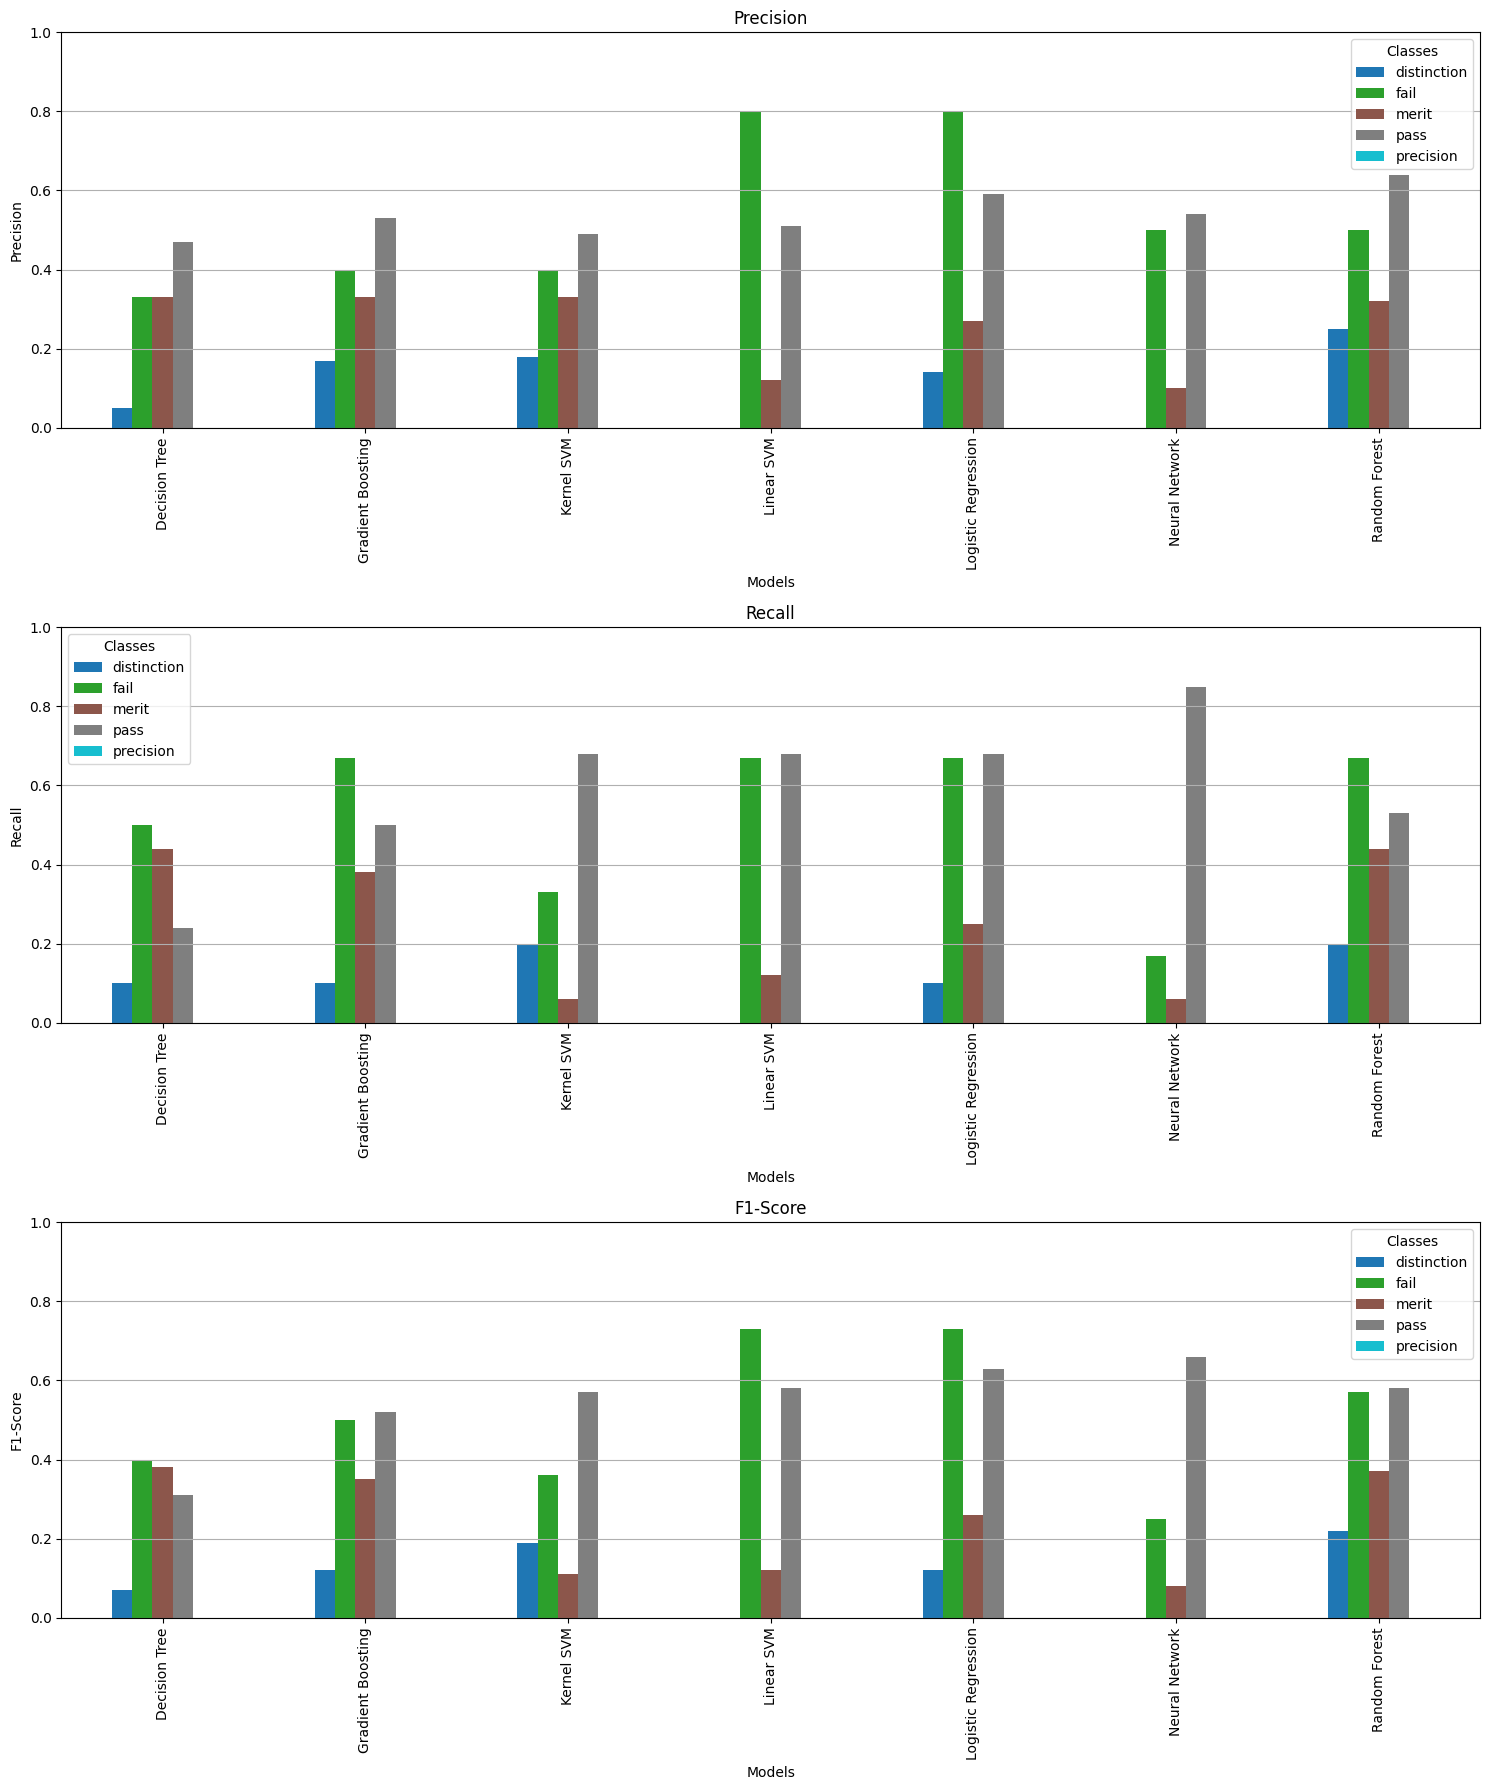

In [ ]:
#Extracting metrics for each class from the combined DataFrame for visualisation
pivot_df = all_reports_df.pivot(index='Model', columns='Class', values=['Precision', 'Recall', 'F1-Score'])

# Convert string values in pivot_df to float for plotting
pivot_df = pivot_df.apply(pd.to_numeric, errors='coerce')

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(15, 18))

metrics = ['Precision', 'Recall', 'F1-Score']
for ax, metric in zip(axes, metrics):
    pivot_df[metric].plot(kind='bar', ax=ax, colormap='tab10')
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xlabel("Models")
    ax.legend(title="Classes")
    ax.set_ylim(0, 1)  # Setting y-axis limits from 0 to 1 for clarity
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

---
multiple runs
---

---
**Accuracy of Models**
--

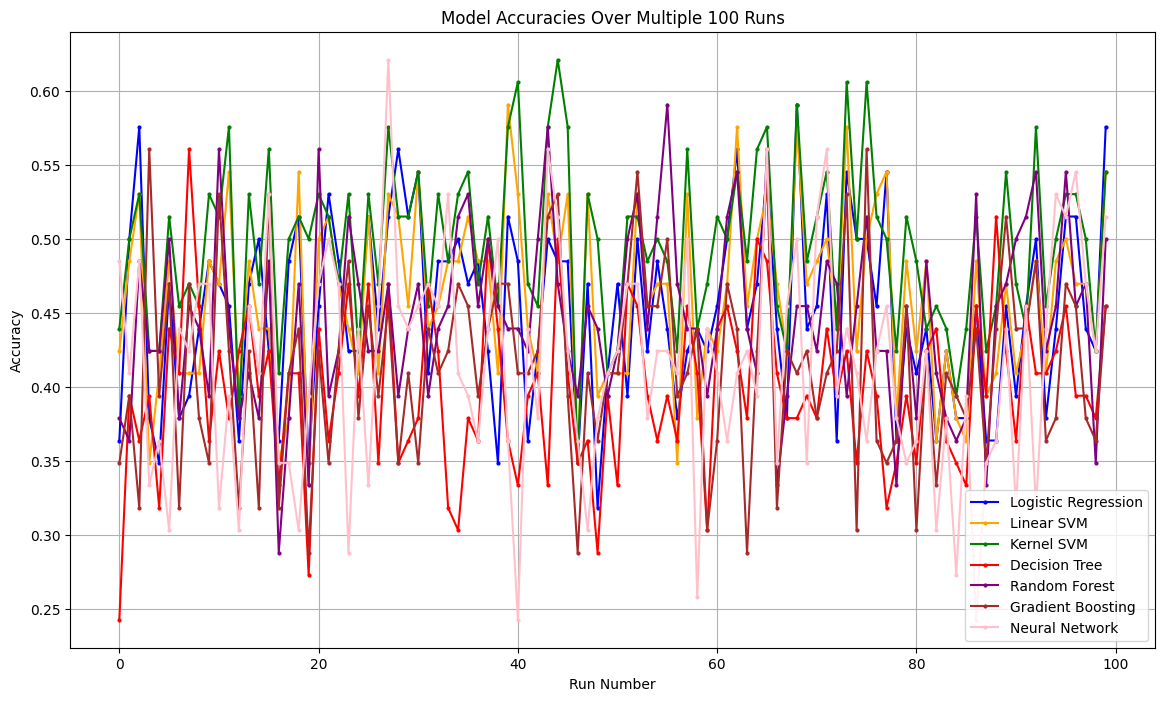

In [ ]:
# Define a function to compute the accuracies for each model over multiple runs
def multiple_runs_accuracies(runs=10):
    all_results = {name: [] for name in models.keys()}

    for _ in range(runs):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        for name, model in models.items():
            model_clone = model.__class__(**model.get_params())  # Create a fresh clone of the model
            model_clone.fit(X_train, y_train)
            accuracy = model_clone.score(X_test, y_test)
            all_results[name].append(accuracy)

    return all_results

# Run the models 200 times
runs = 100
all_results = multiple_runs_accuracies(runs)

# Define distinct colors for each model for better visualization
colors = {
    "Logistic Regression": "blue",
    "Linear SVM": "orange",
    "Kernel SVM": "green",
    "Decision Tree": "red",
    "Random Forest": "purple",
    "Gradient Boosting": "brown",
    "Neural Network": "pink"
}
# Define line widths for each model for better visualization
#line_widths = {name: 1.5 for name in models.keys()}  # default line width for all models
#line_widths["Random Forest"] = 6  # make Random Forest line thicker

# Plot the results with distinct colors and line widths
plt.figure(figsize=(14, 8))
for name, accuracies in all_results.items():
    plt.plot(range(runs), accuracies, marker='o', markersize = 2, label=name, color=colors[name])

plt.title(f'Model Accuracies Over Multiple {runs} Runs')
plt.xlabel('Run Number')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Predict using the best model from the grid search
y_pred_best = grid_search.predict(X_test_scaled)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best, labels=grid_search.classes_)

conf_matrix, grid_search.classes_

(array([[ 2,  0,  2,  6],
        [ 0,  2,  0,  4],
        [ 1,  0,  1, 14],
        [ 7,  2,  1, 24]], dtype=int64),
 array(['distinction', 'fail', 'merit', 'pass'], dtype=object))

In [ ]:
# Load the uploaded Excel file
modelaccuracy = pd.read_excel("data/model-accuracy.xlsx")

# Display the first few rows to understand the structure of the data
modelaccuracy.head()

,Logistic Regression,Linear SVM,Kernel SVM,Decision Tree,Random Forest,Gradient Boosting,Neural Network
0,0.409091,0.484848,0.530303,0.393939,0.424242,0.424242,0.409091
1,0.378788,0.363636,0.424242,0.454545,0.500000,0.484848,0.287879
2,0.439394,0.393939,0.439394,0.424242,0.393939,0.287879,0.333333
3,0.424242,0.439394,0.424242,0.287879,0.424242,0.378788,0.393939
4,0.454545,0.439394,0.469697,0.454545,0.545455,0.469697,0.439394


In [ ]:
mean_accuracy = modelaccuracy.mean()

mean_accuracy



Logistic Regression    0.444394
Linear SVM             0.455909
Kernel SVM             0.494091
Decision Tree          0.394545
Random Forest          0.447273
Gradient Boosting      0.428485
Neural Network         0.400152
dtype: float64

In [ ]:
median_accuracy = modelaccuracy.median()

median_accuracy

Logistic Regression    0.439394
Linear SVM             0.454545
Kernel SVM             0.500000
Decision Tree          0.393939
Random Forest          0.454545
Gradient Boosting      0.424242
Neural Network         0.409091
dtype: float64

In [ ]:
std_dev = modelaccuracy.std()

std_dev

Logistic Regression    0.057547
Linear SVM             0.059568
Kernel SVM             0.058460
Decision Tree          0.058063
Random Forest          0.052463
Gradient Boosting      0.050279
Neural Network         0.076416
dtype: float64

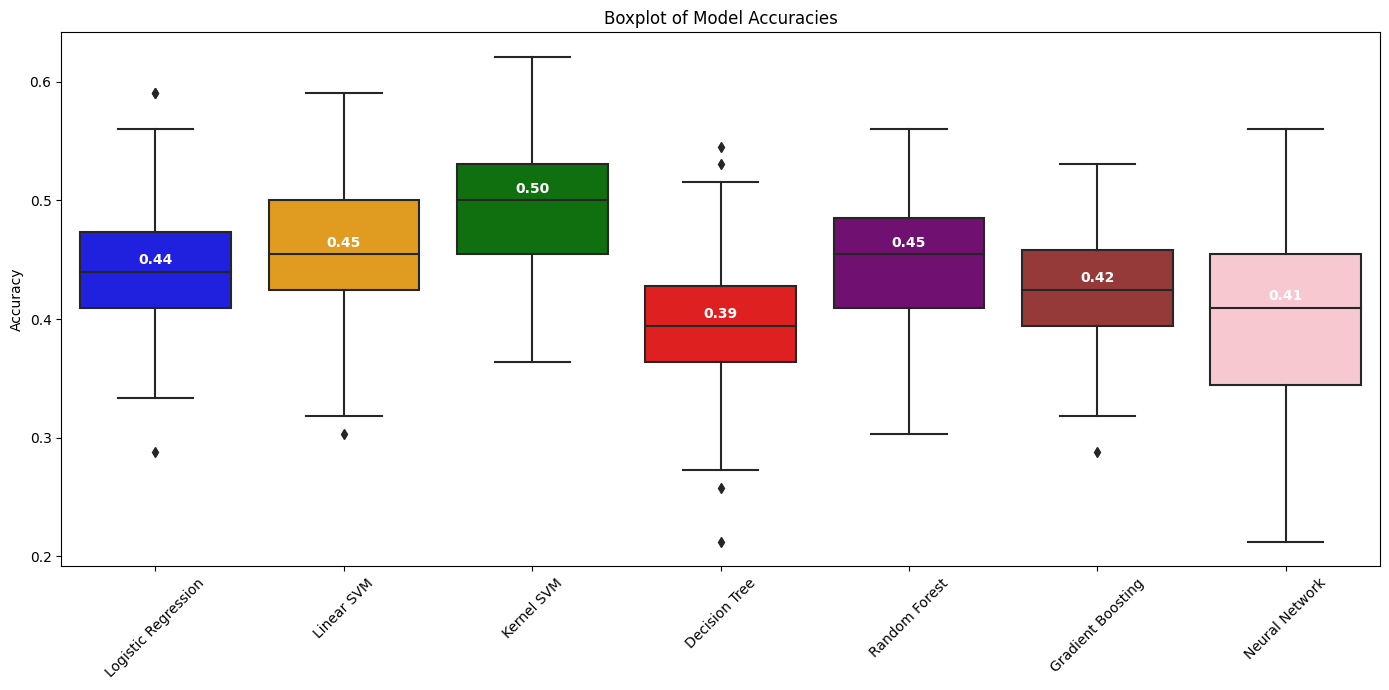

In [ ]:
# Initialize the figure for boxplots
plt.figure(figsize=(14, 7))

# Create boxplots for each model using the colors from the dictionary
sns.boxplot(data=modelaccuracy, palette=colors)

# Annotate medians
medians = modelaccuracy.median()
for i, median in enumerate(medians):
    plt.text(i, median + 0.01, f"{median:.2f}", ha='center', va='center', fontweight='bold', color='white')

plt.title("Boxplot of Model Accuracies")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

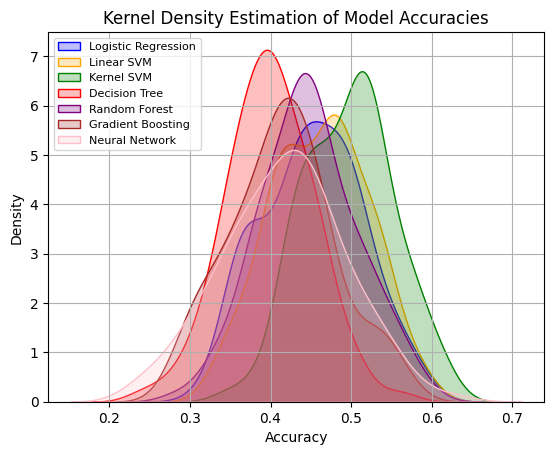

In [ ]:
for name, accuracies in all_results.items():
    sns.kdeplot(accuracies, label=name, fill=True, color=colors[name])

plt.title('Kernel Density Estimation of Model Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.legend(fontsize=8, loc="upper left")
plt.grid(True)
plt.show()

In [ ]:

# Convert the dictionary to a DataFrame
df = pd.DataFrame(all_results)

# Save the DataFrame to an Excel file
file_path = "data/model-accuracy.xlsx"
df.to_excel(file_path, index=False)

---
kernel svm
---

In [ ]:
# Extract features and target variable
X = data.drop("FMP Grades", axis=1)
y = data["FMP Grades"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape



# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]  # Displaying the first 5 scaled training samples for verification




array([[ 0.00681602,  0.28454195,  0.82641866,  0.04538233,  0.34043549],
       [-0.14965618, -0.25373167, -0.00843284, -0.01113152, -0.12574114],
       [-1.55790607, -0.01449895, -0.77371339, -0.91535313, -0.92212622],
       [-1.63614217, -0.79200529, -0.70414243, -0.91535313, -1.17463856],
       [-1.01025334, -0.55277257, -0.49542956,  0.10189619, -0.53364569]])

In [ ]:
# Define the range of values for C to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Initialise the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Perform the grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Extract the results
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

best_C, best_score



(1, 0.4656023222060958)

In [ ]:
# Initialise the SVM with an RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm = svm_rbf
# Train the model
svm_rbf.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = svm_rbf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

accuracy, report

(0.4393939393939394,
 '              precision    recall  f1-score   support\n\n distinction       0.20      0.20      0.20        10\n        fail       0.50      0.33      0.40         6\n       merit       0.25      0.06      0.10        16\n        pass       0.50      0.71      0.59        34\n\n    accuracy                           0.44        66\n   macro avg       0.36      0.33      0.32        66\nweighted avg       0.39      0.44      0.39        66\n')

(66, 5)


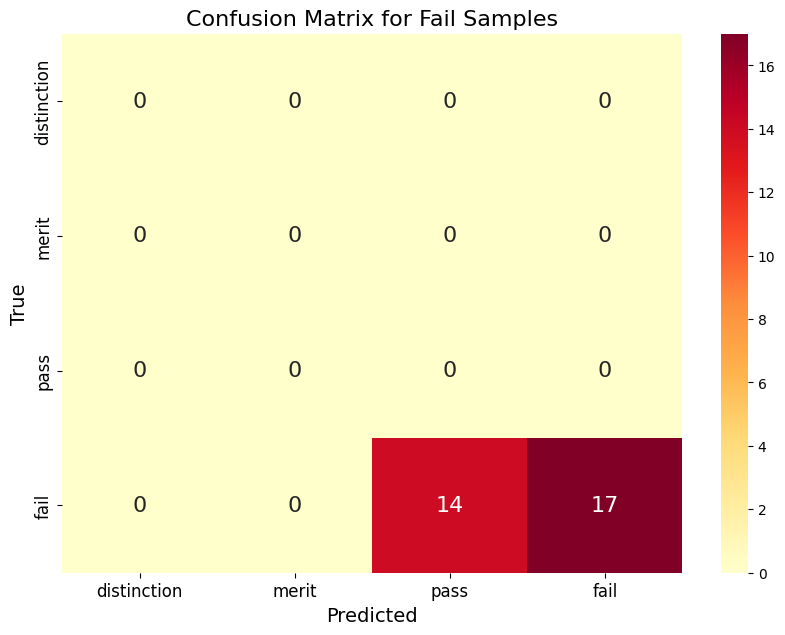

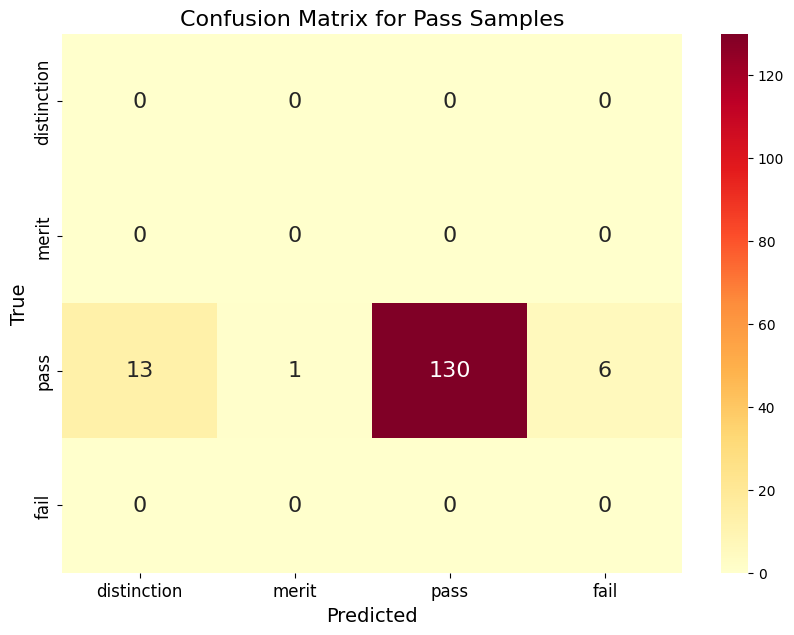

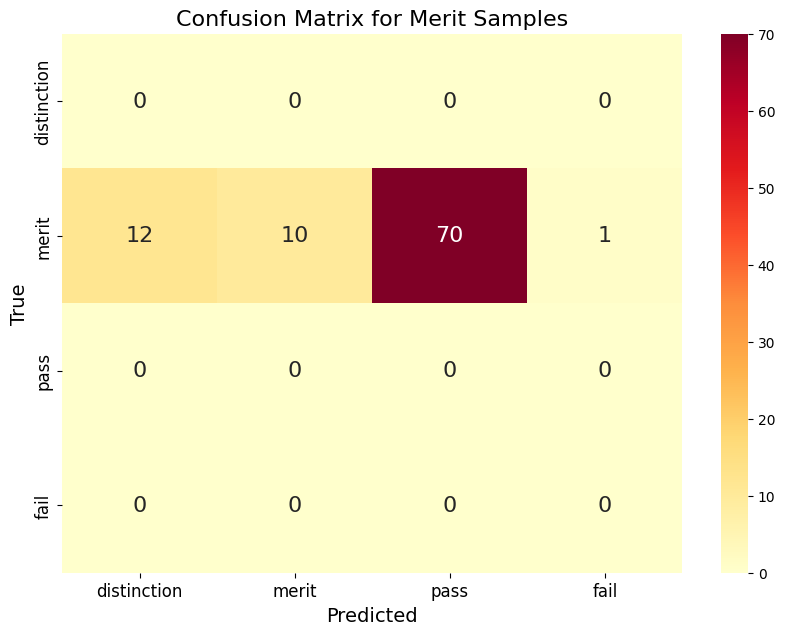

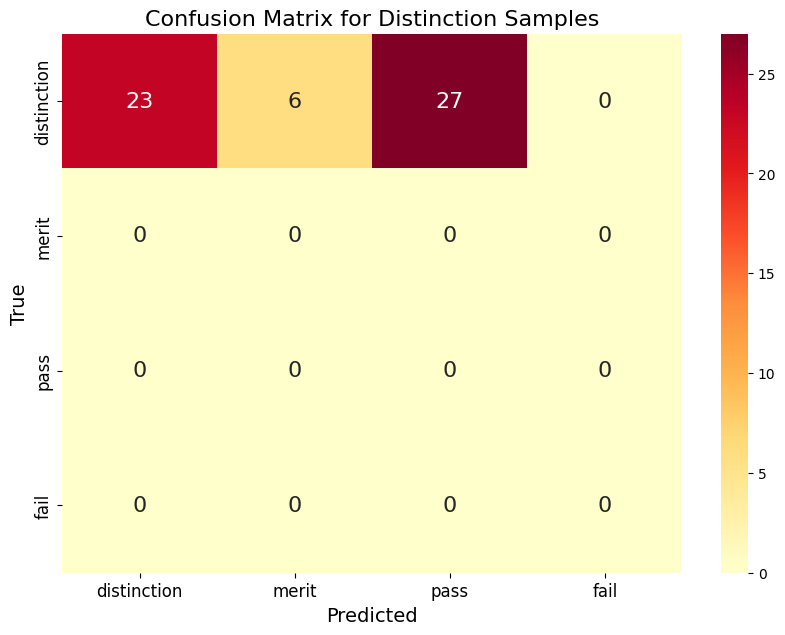

In [ ]:
svm = SVC(C=1, kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

print(X_test.shape)


# Define a function to evaluate SVM on specific grade samples
def evaluate_on_grade(grade):
    grade_data = data[data["FMP Grades"] == grade]
    X_grade = grade_data.drop("FMP Grades", axis=1)
    y_grade = grade_data["FMP Grades"]

    # Predict using the trained SVM model
    y_grade_pred = svm.predict(X_grade)

    # Compute accuracy and confusion matrix
    accuracy_grade = accuracy_score(y_grade, y_grade_pred)
    cm_grade = confusion_matrix(y_grade, y_grade_pred, labels=y.unique())

    return accuracy_grade, cm_grade

def plot_confusion_matrix_for_grade(grade, cm):
    """
    Plot the confusion matrix for a specific grade.

    Parameters:
    - grade: The specific grade ("pass", "merit", or "distinction")
    - cm: The confusion matrix for the grade
    """

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g', cmap='YlOrRd', xticklabels=y.unique(), yticklabels=y.unique(), annot_kws={"size": 16})
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('True', fontsize=14)
    plt.title(f'Confusion Matrix for {grade.title()} Samples', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Plot the confusion matrices for "fail", "pass", "merit", and "distinction" samples
plot_confusion_matrix_for_grade("fail", cm_fail)
plot_confusion_matrix_for_grade("pass", cm_pass)
plot_confusion_matrix_for_grade("merit", cm_merit)
plot_confusion_matrix_for_grade("distinction", cm_distinction)

---
**CLUSTERING - UNSUPERVISED LEARNING**
---

c:\Users\rikkv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


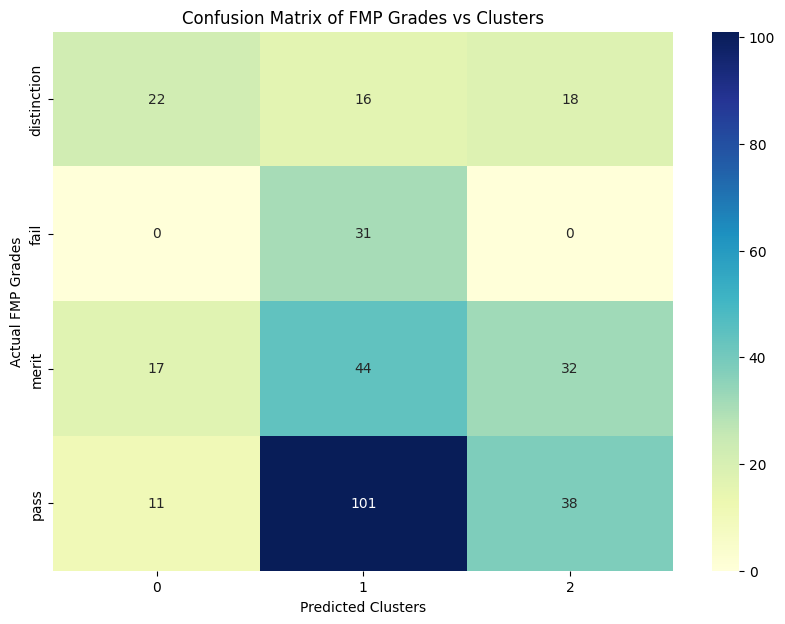

Cluster,0,1,2
FMP Grades,,,
distinction,39.285714,28.571429,32.142857
fail,0.000000,100.000000,0.000000
merit,18.279570,47.311828,34.408602
pass,7.333333,67.333333,25.333333


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Drop the FMP Grades column
X = data.drop('FMP Grades', axis=1)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the clusters to the dataset for comparison
data['Cluster'] = clusters

data.head()

cross_tab = pd.crosstab(data['FMP Grades'], data['Cluster'])
cross_tab

# Attempt to generate the heatmap visualization of the cross-tabulation again
plt.figure(figsize=(10, 7))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="g", cbar=True)
plt.title('Confusion Matrix of FMP Grades vs Clusters')
plt.ylabel('Actual FMP Grades')
plt.xlabel('Predicted Clusters')
plt.show()

# Create the cross-tabulation
cross_tab = pd.crosstab(data['FMP Grades'], data['Cluster'])

# Calculate the percentages of each FMP grade in each cluster
percentage_distribution = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
percentage_distribution

In [ ]:
cross_tab = pd.crosstab(data['FMP Grades'], data['Cluster'])
cross_tab

Cluster,0,1,2,3,4,5,6
FMP Grades,,,,,,,
distinction,22,12,3,1,0,10,8
fail,0,0,2,25,4,0,0
merit,17,25,17,2,0,15,17
pass,11,49,21,30,1,18,20


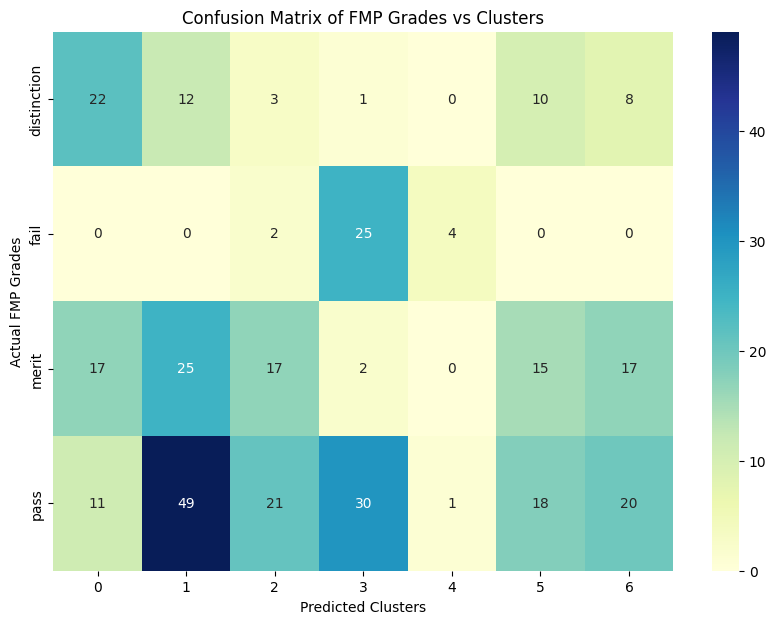

In [ ]:
# Attempt to generate the heatmap visualization of the cross-tabulation again
plt.figure(figsize=(10, 7))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="g", cbar=True)
plt.title('Confusion Matrix of FMP Grades vs Clusters')
plt.ylabel('Actual FMP Grades')
plt.xlabel('Predicted Clusters')
plt.show()

In [ ]:
# Create the cross-tabulation
cross_tab = pd.crosstab(data['FMP Grades'], data['Cluster'])

# Calculate the percentages of each FMP grade in each cluster
percentage_distribution = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
percentage_distribution

Cluster,0,1,2,3,4,5,6
FMP Grades,,,,,,,
distinction,39.285714,21.428571,5.357143,1.785714,0.000000,17.857143,14.285714
fail,0.000000,0.000000,6.451613,80.645161,12.903226,0.000000,0.000000
merit,18.279570,26.881720,18.279570,2.150538,0.000000,16.129032,18.279570
pass,7.333333,32.666667,14.000000,20.000000,0.666667,12.000000,13.333333
